# Part 2

## Model building and Evaluation


# Testing Features

> Lets create model using Keras **Functional API** to check how the features perform.



In [ ]:
file_name = '/content/drive/MyDrive/aiffel/aiffelthon/model/checkpoint-epoch-{}-trial-001.h5'.format(EPOCHS)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-8,mode='min'), #미분하다 막히면 lr 변경해줌
    tf.keras.callbacks.ModelCheckpoint(file_name, monitor='val_loss', verbose=0, save_best_only=True,)
]

* Here i m creating **three** different **CNN** and then Combining them to a **Dense Network**.

##MFCC model

In [ ]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input) # (20, 87, 32)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) # (10, 43, 32)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x) # (10, 22, 64)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) # (5, 11, 64)

x=keras.layers.Conv2D(96,2,padding='same')(x) # (5, 11, 96)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) # (2, 5, 96)

x=keras.layers.Conv2D(128,2,padding='same')(x) # (2, 5, 128)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x) # (, 128)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfccInput (InputLayer)      [(None, 20, 259, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 20, 87, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 20, 87, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 87, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 22, 64)        18

##CSTFT model

In [ ]:
croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)


x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [ ]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cromaInput (InputLayer)     [(None, 12, 259, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 87, 32)        832       
                                                                 
 batch_normalization_4 (Batc  (None, 12, 87, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 12, 87, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 43, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 22, 64)         1

##MSPEC model

In [ ]:
mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [ ]:
##########################################모델 변경######################################################## 

mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input) # (64, 87, 32)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) # (32, 43, 32)

skip_x = x # (32, 43, 32) #skip connection 추가
skip_x = keras.layers.Conv2D(96,3,strides=(4,4),padding='same')(skip_x) #(8, 11, 96)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x) #(16, 22, 64)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) #(8, 11, 64)

x=keras.layers.Conv2D(96,2,padding='same')(x) #(8, 11, 96)
x = keras.layers.Add()([x,skip_x])

x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) #(4, 5, 96)

x=keras.layers.Conv2D(128,2,padding='same')(x) #(4, 5, 128)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x) #(, 128)

mSpec_model_1=keras.Model(mSpec_input, mSpec_output, name="mSpecModel_1")

In [ ]:
mSpec_model_1.summary()

Model: "mSpecModel_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mSpecInput (InputLayer)        [(None, 128, 259, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 64, 87, 32)   832         ['mSpecInput[0][0]']             
                                                                                                  
 batch_normalization_18 (BatchN  (None, 64, 87, 32)  128         ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                       

##ADD model

In [ ]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
MFCC=mfcc_model(input_mfcc) #mfcc는 mfcc model에 대한 output

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
CROMA=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
MSPEC=mSpec_model_1(input_mSpec)


concat=keras.layers.concatenate([MFCC,CROMA,MSPEC])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net_1=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [ ]:
net_1.summary()

Model: "Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mfcc (InputLayer)              [(None, 20, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 croma (InputLayer)             [(None, 12, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 mspec (InputLayer)             [(None, 128, 259, 1  0           []                               
                                )]                                                              

##NET_1

In [ ]:
accuracy='sparse_categorical_accuracy'
sparseLoss=keras.losses.SparseCategoricalCrossentropy()

from keras import backend as K
K.clear_session()
net_1.compile(optimizer='nadam', loss=sparseLoss, metrics=[accuracy])
K.set_value(net_1.optimizer.learning_rate, 0.001)

In [ ]:
file_name = '/content/drive/MyDrive/aiffel/aiffelthon/model/net_1_1_checkpoint-001.h5'
my_callbacks_2 = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-8,mode='min'), #미분하다 막히면 lr 변경해줌
    tf.keras.callbacks.ModelCheckpoint(file_name, monitor='val_loss', verbose=0, save_best_only=True,)
]

In [ ]:
history_1=net_1.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train}, # fit 할 때 ndarray > tensor로 바꾸는 느낌?
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=1,
    callbacks=my_callbacks_2
)

Epoch 1/100
162/162 [==============================] - 10s 29ms/step - loss: 0.4902 - sparse_categorical_accuracy: 0.8338 - val_loss: 0.3716 - val_sparse_categorical_accuracy: 0.8696 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 4s 25ms/step - loss: 0.3145 - sparse_categorical_accuracy: 0.8871 - val_loss: 0.3412 - val_sparse_categorical_accuracy: 0.8904 - lr: 0.0010
Epoch 3/100
162/162 [==============================] - 4s 27ms/step - loss: 0.2651 - sparse_categorical_accuracy: 0.9024 - val_loss: 0.2221 - val_sparse_categorical_accuracy: 0.9200 - lr: 0.0010
Epoch 4/100
162/162 [==============================] - 4s 25ms/step - loss: 0.2363 - sparse_categorical_accuracy: 0.9124 - val_loss: 0.2169 - val_sparse_categorical_accuracy: 0.9258 - lr: 0.0010
Epoch 5/100
162/162 [==============================] - 4s 23ms/step - loss: 0.2371 - sparse_categorical_accuracy: 0.9124 - val_loss: 0.3148 - val_sparse_categorical_accuracy: 0.8928 - lr: 0.0010
Epoch 6/100
162/162 [===

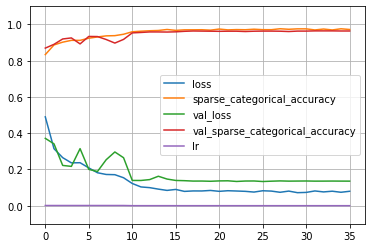

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [ ]:
net_1.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

54/54 [==============================] - 0s 7ms/step - loss: 0.1354 - sparse_categorical_accuracy: 0.9641


[0.13542509078979492, 0.964057981967926]

 - MFCC, STFT, Mel-spec 모든 모델에 skip connection을 추가해 보니 accuaracy가 더 낮아져서 Mel-spec model만 skip connection을 적용했습니다